<a href="https://colab.research.google.com/github/SUBINMa/CSharp/blob/master/Copy_of_cmu_dele_week_2_ohours_6_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Office Hours II

- Review `numpy` and `pytorch`
- Perceptron with `numpy` and `pytorch`
- Training a basic network with `pytorch`

[Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.72721&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

#### Perceptron

$$
{\displaystyle f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}}}$$

In [ ]:
from sklearn.datasets import make_classification, make_blobs

In [ ]:
### make a basic classification dataset
X, y = make_blobs(centers = 2, center_box=[-3, 3], random_state = 22)

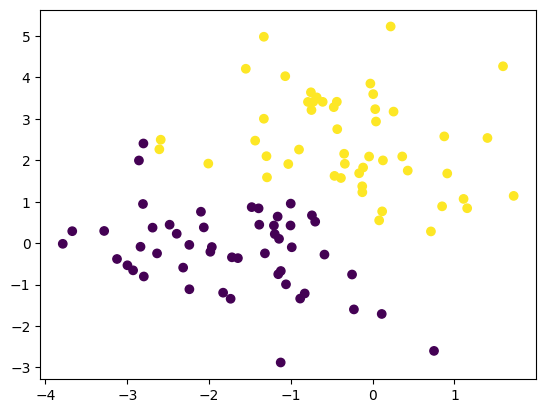

In [ ]:
### Visualize it
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
X[:5]

array([[-1.03160713,  1.91014169],
       [-3.78826528, -0.01542632],
       [-2.06406011,  0.38040109],
       [-2.24036591, -1.11218564],
       [-2.31662455, -0.58986342]])

In [ ]:
X_train = X[:75]
X_test = X[75:]
y_train = y[:75]
y_test = y[75:]

In [ ]:
### Add Bias Term
ones = np.ones(shape = (75, 1))
Xb_train = np.concatenate((ones, X_train), axis = 1)
ones = np.ones(shape = (25, 1))
Xb_test = np.concatenate((ones, X_test), axis = 1)
Xb_train.shape, Xb_test.shape

((75, 3), (25, 3))

In [ ]:
Xb_train[:5]

array([[ 1.        , -1.03160713,  1.91014169],
       [ 1.        , -3.78826528, -0.01542632],
       [ 1.        , -2.06406011,  0.38040109],
       [ 1.        , -2.24036591, -1.11218564],
       [ 1.        , -2.31662455, -0.58986342]])

In [ ]:
### initial weights
w = np.array([0, 1, 2])

In [ ]:
### Find weighted sum
Xb_train@w

array([ 2.78867625, -3.81911792, -1.30325794, -4.46473719, -3.49635139,
        3.21085792,  4.27632416, -4.2390645 , -0.58037626,  2.84289468,
       -6.88325592, -4.06532259,  2.33250956, -4.21820467, -1.76490513,
        6.99248023, 10.1336195 ,  6.03003677,  6.4813569 ,  1.65182037,
        4.13963501, -2.36894418,  3.9340336 , -2.32294523, -4.44994818,
        6.21135832, -0.49450555, -2.65195173,  0.12332334,  1.83267846,
        2.62821716,  6.35396184,  1.13539062, -3.5607018 ,  6.60715882,
       -2.40174329,  6.1039037 ,  3.49259107, -4.40500531, -0.93467253,
       -1.13907609, -4.41966903,  7.20173202,  3.24832829, -0.35576757,
        0.60213687,  1.92429211,  3.53474904,  5.91427019,  3.96754916,
       -2.46559814,  6.0911813 , -0.91562176, -2.69192771,  4.67694259,
       -0.1499049 ,  6.02815636,  5.67962439,  2.75890499, -3.01022402,
        4.54779174, -3.09311681,  2.01029459, 10.68095967, -3.88823036,
        0.28733484,  1.28021782, -1.59035455,  5.07067857, -1.94

In [ ]:
### Make predictions
yhat = np.where(Xb_train@w > 0, 1, 0)

In [ ]:
yhat

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
y_train

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
### Evaluate predictions
sum(y_train == yhat)/len(y_train)

0.9066666666666666

In [ ]:
### actual y
y_train

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
### predicted y
yhat

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0])

#### Improving the Model

$$w_{i + 1} = w_i - lr*(y - yhat)*-x$$

In [ ]:
### update the weights
w = w - 0.1*(y_train - yhat)@-Xb_train

In [ ]:
w

array([-0.7       ,  2.14377096,  1.16169285])

In [ ]:
sum(np.where(Xb_train@w > 0, 1, 0) == y_train)/len(y_train)

0.9466666666666667

In [ ]:
### do this repeatedly
w = np.array([0, 1, 2])
lr = 0.01
for epoch in range(100):
  weighted_sum = Xb_train@w
  yhat = np.where(weighted_sum > 0, 1, 0)
  w = w - lr*(y_train - yhat)@-Xb_train
  print(f'Accuracy {sum(yhat == y_train)/len(y_train): .2f} in epoch: {epoch}')
  test_preds = np.where(Xb_test@w > 0, 1, 0)
  print(f'Test Acc: {sum(y_test == test_preds)/len(y_test)}')
  #weighted sum


Accuracy  0.91 in epoch: 0
Test Acc: 0.96
Accuracy  0.95 in epoch: 1
Test Acc: 0.96
Accuracy  0.95 in epoch: 2
Test Acc: 1.0
Accuracy  0.96 in epoch: 3
Test Acc: 1.0
Accuracy  0.96 in epoch: 4
Test Acc: 1.0
Accuracy  0.97 in epoch: 5
Test Acc: 1.0
Accuracy  0.99 in epoch: 6
Test Acc: 1.0
Accuracy  0.97 in epoch: 7
Test Acc: 1.0
Accuracy  0.99 in epoch: 8
Test Acc: 1.0
Accuracy  0.99 in epoch: 9
Test Acc: 1.0
Accuracy  0.99 in epoch: 10
Test Acc: 1.0
Accuracy  0.97 in epoch: 11
Test Acc: 1.0
Accuracy  0.99 in epoch: 12
Test Acc: 1.0
Accuracy  0.99 in epoch: 13
Test Acc: 1.0
Accuracy  0.99 in epoch: 14
Test Acc: 1.0
Accuracy  0.97 in epoch: 15
Test Acc: 1.0
Accuracy  0.99 in epoch: 16
Test Acc: 1.0
Accuracy  1.00 in epoch: 17
Test Acc: 1.0
Accuracy  1.00 in epoch: 18
Test Acc: 1.0
Accuracy  1.00 in epoch: 19
Test Acc: 1.0
Accuracy  1.00 in epoch: 20
Test Acc: 1.0
Accuracy  1.00 in epoch: 21
Test Acc: 1.0
Accuracy  1.00 in epoch: 22
Test Acc: 1.0
Accuracy  1.00 in epoch: 23
Test Acc: 1.0


In [ ]:
### examine performance
yhat

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
w

array([-0.25      ,  1.3690803 ,  1.69733605])

### Pytorch and Regression

In [ ]:
x = np.random.random_integers(low = 1, high = 30, size = 15)
y = 3*x + 4 + np.random.normal(size = len(x), scale = 3)

<ipython-input-141-df3b2012fec4>:1: DeprecationWarning: This function is deprecated. Please call randint(1, 30 + 1) instead
  x = np.random.random_integers(low = 1, high = 30, size = 15)


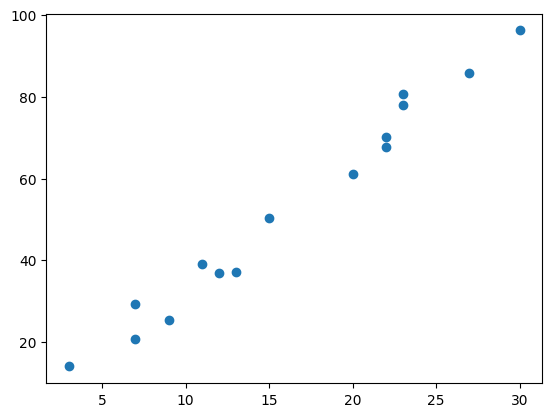

In [ ]:
plt.scatter(x, y)

In [ ]:
xt = torch.tensor(x)
yt = torch.tensor(y)

In [ ]:
xt

tensor([ 3, 20, 23,  7, 22, 11,  9, 22, 30, 12, 23,  7, 27, 13, 15])

In [ ]:
yt

tensor([14.0554, 61.0717, 77.8688, 20.8289, 70.0945, 39.0084, 25.4236, 67.7747,
        96.2004, 36.8346, 80.6808, 29.2808, 85.9054, 37.1062, 50.3545],
       dtype=torch.float64)

In [ ]:
### define the model
def model(x, w, b):
  return x*w + b

In [ ]:
### define our loss function
def loss_fn(y, yhat):
  sq_diff = (y - yhat)**2
  return sq_diff.mean()

In [ ]:
### parameters
w = torch.ones(())
b = torch.zeros(())

In [ ]:
### yhat
yhat = model(xt, w, b)

In [ ]:
yhat

tensor([ 3., 20., 23.,  7., 22., 11.,  9., 22., 30., 12., 23.,  7., 27., 13.,
        15.])

In [ ]:
## compute loss
loss = loss_fn(yt, yhat)

In [ ]:
loss

tensor(24597.1882, dtype=torch.float64)

#### Updating Weights

In [ ]:
#derivative of loss
def dloss(yhat, y):
  diff_d = 2*(yhat - y)/yhat.size(0)
  return diff_d

In [ ]:
#derivative of model w/respect to w
def dmodel_dw(x, w, b):
  return x

In [ ]:
#d dbias
def dmodel_db(x, w, b):
  return 1.0

In [ ]:
#gradient function
def grad_func(y, x, yhat, w, b):
  dloss_m = dloss(yhat, y)
  dloss_dw = dloss_m*dmodel_dw(x, w, b)
  dloss_db = dloss_m*dmodel_db(x, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [ ]:
#training loop
def training_loop(n_epochs, lr, params, x, y):
  for epoch in range(1, n_epochs + 1):
    w, b = params
    yhat = model(x, w, b)
    loss = loss_fn(y, yhat)
    grad = grad_func(y, x, yhat, w, b)
    params = params - lr*grad
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss {loss}')
  return params

In [ ]:
#test it
training_loop(100, .001, torch.tensor([0, 0]), xt, yt)

Epoch 100, Loss 201.70260962506657


tensor([3.2204, 0.2091], dtype=torch.float64)

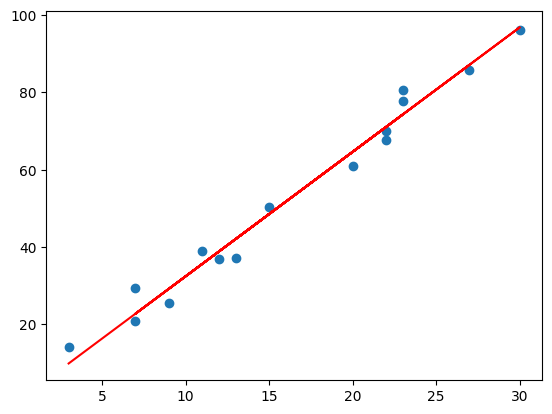

In [ ]:
#scale inputs
plt.scatter(xt, yt)
plt.plot(xt, 3.2204*x + .2091, color = 'red')

#### Using `pytorch` for gradient computation

In [ ]:
#define the model
def model(x, w, b):
  return x*w + b

In [ ]:
#loss function
def loss_fn(y, yhat):
  diff_sq = (y - yhat)**2
  return diff_sq.sum()

In [ ]:
#parameters
params = torch.tensor([1.0, 0.0], requires_grad = True)

In [ ]:
params

tensor([1., 0.], requires_grad=True)

In [ ]:
#loss
loss = loss_fn(yt, model(xt, *params))

In [ ]:
loss

tensor(24597.1882, dtype=torch.float64, grad_fn=<SumBackward0>)

In [ ]:
#pytorch gradient
params.grad is None

True

In [ ]:
#backward method
loss.backward()

In [ ]:
#gradient
params.grad

tensor([-21870.4102,  -1096.9773])

In [ ]:
### GRADIENTS ACCUMULATE!!!
if params.grad is not None:
  params.grad.zero_()

In [ ]:
#training loop
def training_loop(n_epochs, lr, params, x, y):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()
    yhat = model(x, *params)
    loss = loss_fn(y, yhat)
    loss.backward()
    with torch.no_grad():
      params -= lr * params.grad
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss {loss}')
  return params

In [ ]:
#test it
training_loop(5000, 1e-4, torch.tensor([1.0, 0.0], requires_grad = True), xt, yt)

Epoch 100, Loss 201.87315377355787
Epoch 200, Loss 201.3695457061326
Epoch 300, Loss 200.9201672796811
Epoch 400, Loss 200.5191651617864
Epoch 500, Loss 200.1613640774603
Epoch 600, Loss 199.84210887721633
Epoch 700, Loss 199.5572121575447
Epoch 800, Loss 199.3029546548471
Epoch 900, Loss 199.0761537084402
Epoch 1000, Loss 198.87375901377382
Epoch 1100, Loss 198.69316189906104
Epoch 1200, Loss 198.5319813612822
Epoch 1300, Loss 198.38826288298657
Epoch 1400, Loss 198.25990832585518
Epoch 1500, Loss 198.14533850880568
Epoch 1600, Loss 198.0430954163214
Epoch 1700, Loss 197.9521043805086
Epoch 1800, Loss 197.8707401233768
Epoch 1900, Loss 197.79813500026142
Epoch 2000, Loss 197.7333465918419
Epoch 2100, Loss 197.67558253790108
Epoch 2200, Loss 197.62386695557018
Epoch 2300, Loss 197.57800727242173
Epoch 2400, Loss 197.53679208903665
Epoch 2500, Loss 197.5002083328677
Epoch 2600, Loss 197.46746374699813
Epoch 2700, Loss 197.4383347263725
Epoch 2800, Loss 197.41229282572658
Epoch 2900, Los

tensor([3.1618, 1.3865], requires_grad=True)

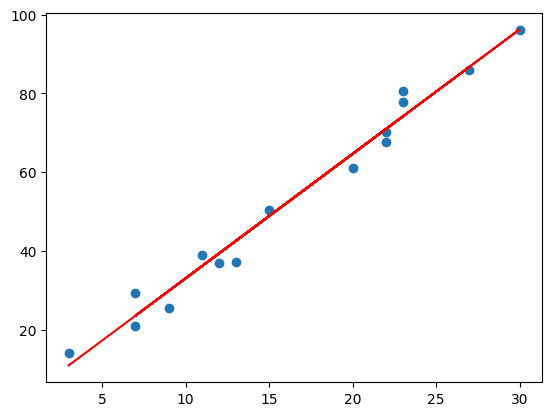

In [ ]:
plt.scatter(xt, yt)
plt.plot(xt, 3.1618*xt + 1.3865, color = 'red')

### `nn.Sequential` and `nn.Linear`

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
#the linear layer
linear_1 = nn.Linear(in_features=1, out_features=1 )

In [ ]:
#parameters
list(linear_1.parameters())

[Parameter containing:
 tensor([[0.1539]], requires_grad=True),
 Parameter containing:
 tensor([0.8091], requires_grad=True)]

In [ ]:
xt = torch.tensor(xt, dtype = torch.float32)

<ipython-input-202-fdb0b0c2c4a7>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xt = torch.tensor(xt, dtype = torch.float32)


In [ ]:
linear_1(xt[0].reshape(-1, 1))

tensor([[1.2709]], grad_fn=<AddmmBackward0>)

In [ ]:
linear_1(xt.unsqueeze(1))

tensor([[1.2709],
        [3.8877],
        [4.3495],
        [1.8866],
        [4.1956],
        [2.5023],
        [2.1945],
        [4.1956],
        [5.4270],
        [2.6563],
        [4.3495],
        [1.8866],
        [4.9652],
        [2.8102],
        [3.1181]], grad_fn=<AddmmBackward0>)

In [ ]:
#sample data
loss_fn = nn.MSELoss()

In [ ]:
yt = torch.tensor(yt, dtype = torch.float32)

<ipython-input-213-d9193dd7f66d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yt = torch.tensor(yt, dtype = torch.float32)


In [ ]:
loss = loss_fn(yt[0], linear_1(xt[0].reshape(-1, 1)))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
optimizer = optim.SGD(linear_1.parameters(), lr = 0.1)

In [ ]:
optimizer.zero_grad()

In [ ]:
loss.backward()

In [ ]:
list(linear_1.parameters()) #original parameters

[Parameter containing:
 tensor([[0.1539]], requires_grad=True),
 Parameter containing:
 tensor([0.8091], requires_grad=True)]

In [ ]:
optimizer.step() #update paramters with gradient descent

In [ ]:
list(linear_1.parameters()) #updated parameters

[Parameter containing:
 tensor([[7.8246]], requires_grad=True),
 Parameter containing:
 tensor([3.3660], requires_grad=True)]